In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle as pkl

"""
Produce: [combined, inf, behavior] x [vegan, plant based, vegetarian] x [monthly, weekly] = 18 time series
"""


'\nProduce: [combined, inf, behavior] x [vegan, plant based, vegetarian] x [monthly, weekly] = 18 time series\n'

In [41]:
def process_gtrends_csv(df,row_start=5):
    # Get rid of top metadata
    without_metadata = df.iloc[row_start:].copy().reset_index(drop=True)
    without_metadata['Time'] = without_metadata.index 
    
    # Add in month
    months = []
    for time in without_metadata['Time']:
        months.append(time%12)
    without_metadata['Month'] = months
    
    return without_metadata

def normalize_shocks(df, ratio_map, date_col='ds'):
    for col in df.columns:
        if col not in ratio_map and col != date_col:
            print('missing col: ', col)
            assert 0
    for shock in ratio_map:
        if shock in df.columns:
            print('normalizing: ', shock, ratio_map[shock])
            print(shock, ratio_map[shock])
            df[shock] = df[shock]*ratio_map[shock]
    return df


In [42]:
weekly = True

if weekly:
    #prefix = '../../data/raw/gtrends/weekly-12-4-23/'
    prefix = '../../data/raw/gtrends/weekly-6-19-24/'
else:
    #prefix = '../../data/raw/gtrends/monthly-12-4-23/'    
    prefix = '../../data/raw/gtrends/monthly-6-19-24/'
    
vegan_ratios = pkl.load(open('../../data/raw/gtrends/vegan_ratios.pkl', 'rb'))
vegan_ratios

{'vegan': 1.0,
 'plant based': 0.13,
 'vegetarian': 0.3,
 'food': 10.0,
 'food near me': 3.571428571428571,
 'recipes': 4.545454545454546,
 'recipe': 8.333333333333334,
 'restaurant': 5.555555555555555,
 'diet plan': 0.12,
 'restaurants': 5.555555555555555,
 'plant-based': 0.0091,
 'plant based recipes': 0.010400000000000001,
 'plant based recipe': 0.0029120000000000005,
 'plant based near me': 0.0028080000000000006,
 'plant based diet plan': 0.0024960000000000004,
 'plant based restaurant': 0.0007987200000000002,
 'plant based restaurants': 0.0019760000000000003,
 'plant based restaurant near me': 0.00019760000000000003,
 'plant based restaurants near me': 0.0007311200000000001,
 'vegan recipes': 0.0637,
 'vegan recipe': 0.07020000000000001,
 'vegan near me': 0.0884,
 'vegan diet plan': 0.004056000000000001,
 'vegan restaurant': 0.020800000000000003,
 'vegan restaurants': 0.0546,
 'vegan restaurant near me': 0.004914,
 'vegan restaurants near me': 0.015834,
 'vegetarian recipes': 0.05

In [43]:
{k: v for k, v in sorted(vegan_ratios.items(), key=lambda item: item[1])}

{'plant based restaurant near me': 0.00019760000000000003,
 'plant based restaurants near me': 0.0007311200000000001,
 'plant based restaurant': 0.0007987200000000002,
 'vegetarian diet plan': 0.0019500000000000001,
 'plant based restaurants': 0.0019760000000000003,
 'plant based diet plan': 0.0024960000000000004,
 'plant based near me': 0.0028080000000000006,
 'plant based recipe': 0.0029120000000000005,
 'vegetarian restaurant near me': 0.003042,
 'vegan diet plan': 0.004056000000000001,
 'vegan restaurant near me': 0.004914,
 'vegetarian restaurants near me': 0.008658,
 'plant-based': 0.0091,
 'plant based recipes': 0.010400000000000001,
 'vegetarian restaurant': 0.01248,
 'vegan restaurants near me': 0.015834,
 'vegetarian near me': 0.0195,
 'vegan restaurant': 0.020800000000000003,
 'vegetarian restaurants': 0.0234,
 'vegetarian recipe': 0.0325,
 'vegan restaurants': 0.0546,
 'vegetarian recipes': 0.059800000000000006,
 'vegan recipes': 0.0637,
 'vegan recipe': 0.07020000000000001

In [44]:
#locs = {'informative': 'gtrends/monthly-12-4-23/informative', 'behavior': 'gtrends/monthly-12-4-23/behavior',
#       'bare': 'gtrends/monthly-12-4-23/confounds/bare'}



locs = {'informative': prefix + 'informative',
        'behavior': prefix + 'behavior',
       'bare': prefix + 'confounds/bare'}

output_loc = prefix.replace('raw', 'prepared') + 'prepared.csv'
#output_loc = prefix + 'prepared-trends-outcomes/prepared.csv'

dfs = {}

for loc in locs:
    filenames = os.listdir(locs[loc])
    for fn in filenames:
        #print(locs[loc] + '/' + fn)
        if not os.path.isfile(locs[loc] + '/' + fn):
            print('not a file: ', fn)
            continue
        if 'DS_Store' in fn:
            continue
        if fn.endswith('_1.csv') or fn.endswith('_2.csv') or fn.endswith('_3.csv') or fn.endswith('_4.csv') or fn.endswith('_5.csv'):
            continue
        search_terms = fn.split('-timeline')[0]
        print(search_terms)
        df = pd.read_csv(locs[loc] + '/' + fn)
        df = df.loc[~df['Search Term'].isin(['Geography', 'Time Period', 'Type', 'Time', np.nan])]    
        #df = process_gtrends_csv(pd.read_csv(locs[loc] + '/' + fn))
        
        remove_cols = ['Unnamed: 0']
        for remove_col in remove_cols:
            if remove_col in df.columns:
                df = df.drop(remove_col, axis=1) 
        
        dfs[search_terms] = df

plant based
plant-based
vegetarian
vegan
plant based restaurants near me
vegan restaurant near me
plant based near me
vegan diet plan
vegan restaurants
vegan restaurants near me
plant based restaurants
plant based diet plan
vegetarian recipes
not a file:  old
plant based recipe
vegan recipes
vegan near me
vegetarian restaurant
vegetarian diet plan
vegetarian near me
plant based restaurant
plant based recipes
vegetarian restaurants
vegan restaurant
vegan recipe
vegetarian restaurant near me
vegetarian restaurants near me
vegetarian recipe
food
recipes
not a file:  old
recipe
food near me
diet plan
restaurant
restaurants


In [45]:
"""
time_name = 'T'
for key in dfs:
    dfs[key][time_name] = pd.to_datetime(dfs[key]['Search Term'], infer_datetime_format=True, errors='coerce')
"""

"\ntime_name = 'T'\nfor key in dfs:\n    dfs[key][time_name] = pd.to_datetime(dfs[key]['Search Term'], infer_datetime_format=True, errors='coerce')\n"

In [46]:
dfs['plant based']

,Search Term,plant based
0,2004-01-03,0.000000
1,2004-01-10,4.108289
2,2004-01-17,0.000000
3,2004-01-24,0.000000
4,2004-01-31,1.867404
...,...,...
1060,2024-04-27,49.359684
1061,2024-05-04,44.952569
1062,2024-05-11,46.715415
1063,2024-05-18,43.189723


In [47]:
# Merge into one dataframe
merged = dfs['vegan'].copy()
merged['vegan'] = merged['vegan'].astype(int)
for term in list(dfs.keys()):
    if term == 'vegan':
        continue
    #print(term)
    merged = merged.merge(dfs[term],on=['Search Term'], how='left')
    merged[term] = merged[term].astype(float)
    #print(merged['Search Term'])
merged = merged.rename(columns={'Search Term': 'ds'})

In [48]:
merged.shape

(1065, 35)

In [49]:
merged.shape

(1065, 35)

In [50]:
merged[['vegan recipes', 'vegan', 'vegetarian', 'plant based']].diff().corr()

,vegan recipes,vegan,vegetarian,plant based
vegan recipes,1.000000,0.396059,0.560239,0.258958
vegan,0.396059,1.000000,0.353549,0.029998
vegetarian,0.560239,0.353549,1.000000,0.168789
plant based,0.258958,0.029998,0.168789,1.000000


In [51]:
# Merge into one dataframe
normalized = normalize_shocks(merged, vegan_ratios)
normalized

normalizing:  vegan 1.0
vegan 1.0
normalizing:  plant based 0.13
plant based 0.13
normalizing:  vegetarian 0.3
vegetarian 0.3
normalizing:  food 10.0
food 10.0
normalizing:  food near me 3.571428571428571
food near me 3.571428571428571
normalizing:  recipes 4.545454545454546
recipes 4.545454545454546
normalizing:  recipe 8.333333333333334
recipe 8.333333333333334
normalizing:  restaurant 5.555555555555555
restaurant 5.555555555555555
normalizing:  diet plan 0.12
diet plan 0.12
normalizing:  restaurants 5.555555555555555
restaurants 5.555555555555555
normalizing:  plant-based 0.0091
plant-based 0.0091
normalizing:  plant based recipes 0.010400000000000001
plant based recipes 0.010400000000000001
normalizing:  plant based recipe 0.0029120000000000005
plant based recipe 0.0029120000000000005
normalizing:  plant based near me 0.0028080000000000006
plant based near me 0.0028080000000000006
normalizing:  plant based diet plan 0.0024960000000000004
plant based diet plan 0.0024960000000000004


,ds,vegan,plant based,plant-based,vegetarian,plant based restaurants near me,vegan restaurant near me,plant based near me,vegan diet plan,vegan restaurants,...,vegetarian restaurant near me,vegetarian restaurants near me,vegetarian recipe,food,recipes,recipe,food near me,diet plan,restaurant,restaurants
0,2004-01-03,5.0,0.000000,0.000000,18.173837,NaN,NaN,NaN,NaN,0.00000,...,NaN,NaN,1.670765,400.000000,227.459016,233.153292,NaN,1.257234,327.629663,146.605866
1,2004-01-10,4.0,0.534078,0.000000,18.401010,NaN,NaN,NaN,NaN,0.00000,...,NaN,NaN,1.458122,420.000000,256.408346,239.814815,NaN,1.283426,361.356246,151.187299
2,2004-01-17,6.0,0.000000,0.000000,17.946664,NaN,NaN,NaN,NaN,0.00000,...,NaN,NaN,1.366990,410.000000,244.001490,246.476337,NaN,1.362003,366.174329,153.478016
3,2004-01-24,5.0,0.000000,0.436800,17.719491,NaN,NaN,NaN,NaN,0.00000,...,NaN,NaN,1.731520,400.000000,248.137109,239.814815,NaN,1.152464,366.174329,144.315149
4,2004-01-31,5.0,0.242763,0.482300,14.311896,NaN,NaN,NaN,NaN,0.00000,...,NaN,NaN,1.336612,380.000000,198.509687,213.168724,NaN,1.126272,361.356246,162.640883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,2024-04-27,34.0,6.416759,0.394170,14.659331,0.000000,0.142506,0.081432,0.034689,2.12976,...,0.107699,0.294372,0.869485,832.119267,125.246747,307.654039,210.714286,3.163636,438.888889,309.297052
1061,2024-05-04,36.0,5.843834,0.361861,14.659331,0.000000,0.196560,0.092664,0.056597,2.21328,...,0.137615,0.329004,0.810202,832.119267,119.801236,307.654039,210.714286,3.163636,455.555556,325.866537
1062,2024-05-11,34.0,6.073004,0.329552,14.419014,0.025548,0.127764,0.112320,0.038340,2.12976,...,0.140607,0.303030,0.770680,822.554678,108.910214,285.678751,203.571429,2.945455,450.000000,336.912860
1063,2024-05-18,35.0,5.614664,0.348937,14.419014,0.000000,0.221130,0.073008,0.043817,2.04624,...,0.140607,0.337662,0.810202,765.167142,117.078481,300.328943,207.142857,2.890909,433.333333,325.866537


In [52]:
normalized['plant based restaurant near me'] = 0

In [53]:
merged['plant_based_plus_plant_based'] = merged[['plant based', 'plant-based']].sum(axis=1)

diets = ['vegan', 'plant based', 'vegetarian']
    
# Temporary, before having weekly downloads done
    
informative_cols = {'vegan': ['vegan'], 'plant based': ['plant based', 'plant-based'], 
                    'vegetarian': ['vegetarian']}

behavior_bare_cols = ['food near me', 'restaurants', 'restaurant', 'recipes', 'recipe', 'diet plan']
behavior_bare_cols_as_suffix = ['near me', 'restaurants', 'restaurant', 'recipes', 'recipe', 'diet plan']
double_count_suffix_cols = ['restaurant near me', 'restaurants near me']

double_count_cols = {}

behavior_cols = {}
for diet in diets:
    behavior_cols[diet] = [diet + ' ' + b for b in behavior_bare_cols_as_suffix]
    double_count_cols[diet] = [diet + ' ' + c for c in double_count_suffix_cols]

print('double count cols: ', double_count_cols)
print('behavior cols: ', behavior_cols)

vegan_informative_cols = ['vegan']
plant_based_informative_cols = ['plant based', 'plant-based']
vegetarian_informative_cols = ['vegetarian']

for diet in diets:
    merged[diet + '_behavior'] = merged[behavior_cols[diet]].sum(axis=1) - merged[double_count_cols[diet]].sum(axis=1)
    merged[diet + '_informative'] = merged[informative_cols[diet]].sum(axis=1) - merged[diet + '_behavior']

merged['informative_bare'] = merged['food'] - merged['food near me']
merged['behavior_bare'] = merged[behavior_bare_cols].sum(axis=1)

double count cols:  {'vegan': ['vegan restaurant near me', 'vegan restaurants near me'], 'plant based': ['plant based restaurant near me', 'plant based restaurants near me'], 'vegetarian': ['vegetarian restaurant near me', 'vegetarian restaurants near me']}
behavior cols:  {'vegan': ['vegan near me', 'vegan restaurants', 'vegan restaurant', 'vegan recipes', 'vegan recipe', 'vegan diet plan'], 'plant based': ['plant based near me', 'plant based restaurants', 'plant based restaurant', 'plant based recipes', 'plant based recipe', 'plant based diet plan'], 'vegetarian': ['vegetarian near me', 'vegetarian restaurants', 'vegetarian restaurant', 'vegetarian recipes', 'vegetarian recipe', 'vegetarian diet plan']}


In [54]:
merged.columns

Index(['ds', 'vegan', 'plant based', 'plant-based', 'vegetarian',
       'plant based restaurants near me', 'vegan restaurant near me',
       'plant based near me', 'vegan diet plan', 'vegan restaurants',
       'vegan restaurants near me', 'plant based restaurants',
       'plant based diet plan', 'vegetarian recipes', 'plant based recipe',
       'vegan recipes', 'vegan near me', 'vegetarian restaurant',
       'vegetarian diet plan', 'vegetarian near me', 'plant based restaurant',
       'plant based recipes', 'vegetarian restaurants', 'vegan restaurant',
       'vegan recipe', 'vegetarian restaurant near me',
       'vegetarian restaurants near me', 'vegetarian recipe', 'food',
       'recipes', 'recipe', 'food near me', 'diet plan', 'restaurant',
       'restaurants', 'plant based restaurant near me',
       'plant_based_plus_plant_based', 'vegan_behavior', 'vegan_informative',
       'plant based_behavior', 'plant based_informative',
       'vegetarian_behavior', 'vegetarian_inf

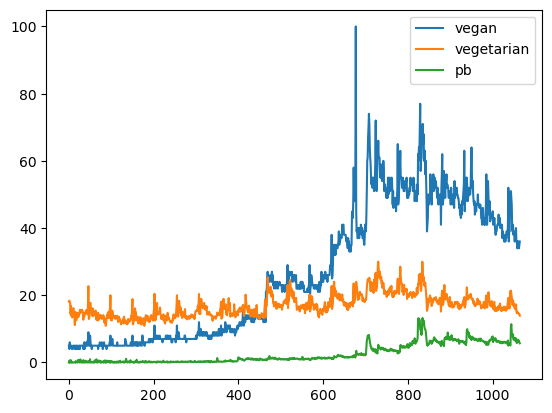

In [55]:
plt.plot(merged['vegan'], label='vegan')
plt.plot(merged['vegetarian'], label='vegetarian')
plt.plot(merged['plant_based_plus_plant_based'], label='pb')
plt.legend()

In [56]:
#merged.to_csv('merged-weekly-6-19-24.csv')

In [57]:
"""
Ones to save:
- vegan, vegetarian, plant based
- [vegan / vegetarian / plant based] x [informative, behavior]
- behavior bare
"""

'\nOnes to save:\n- vegan, vegetarian, plant based\n- [vegan / vegetarian / plant based] x [informative, behavior]\n- behavior bare\n'

In [58]:
subset = merged[['ds', 'vegan','vegetarian', 'plant_based_plus_plant_based', 
            'vegan_informative', 'vegetarian_informative', 
            'plant based_informative', 'vegan_behavior', 'vegetarian_behavior', 'plant based_behavior',
           'behavior_bare', 'informative_bare', 'food']]
#subset = subset.loc[subset['ds'] != '2020-02-29']
subset

,ds,vegan,vegetarian,plant_based_plus_plant_based,vegan_informative,vegetarian_informative,plant based_informative,vegan_behavior,vegetarian_behavior,plant based_behavior,behavior_bare,informative_bare,food
0,2004-01-03,5.0,18.173837,0.000000,2.458380,11.886583,0.000000,2.541620,6.287253,0.000000,936.105071,NaN,400.000000
1,2004-01-10,4.0,18.401010,0.534078,4.000000,13.373783,0.534078,0.000000,5.027227,0.000000,1010.050132,NaN,420.000000
2,2004-01-17,6.0,17.946664,0.000000,3.632147,12.503192,0.000000,2.367853,5.443472,0.000000,1011.492176,NaN,410.000000
3,2004-01-24,5.0,17.719491,0.436800,4.180902,11.391230,0.436800,0.819098,6.328261,0.000000,999.593866,NaN,400.000000
4,2004-01-31,5.0,14.311896,0.725063,3.481339,9.443620,0.725063,1.518661,4.868277,0.000000,936.801812,NaN,380.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,2024-04-27,34.0,14.659331,6.810929,23.859031,9.838972,6.366964,10.140969,4.820359,0.443965,1394.964649,621.404981,832.119267
1061,2024-05-04,36.0,14.659331,6.205695,25.376759,9.619030,5.775814,10.623241,5.040301,0.429881,1422.755290,621.404981,832.119267
1062,2024-05-11,34.0,14.419014,6.402556,24.060645,9.761246,5.928476,9.939355,4.657768,0.474080,1388.018709,618.983249,822.554678
1063,2024-05-18,35.0,14.419014,5.963601,24.886679,9.671376,5.594827,10.113321,4.747638,0.368775,1386.641060,558.024285,765.167142


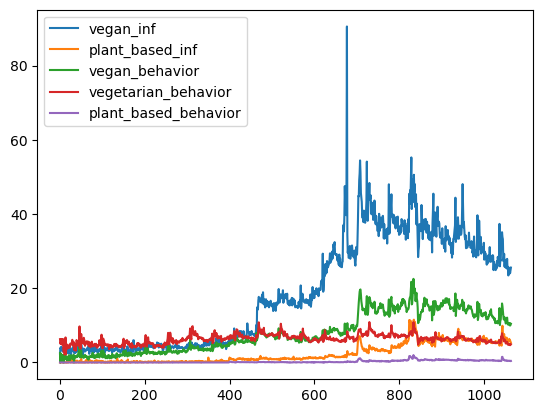

In [59]:
plt.plot(subset['vegan_informative'], label='vegan_inf')
#plt.plot(merged['vegetarian_informative'], label='vegetarian_inf')
plt.plot(subset['plant based_informative'], label='plant_based_inf')

plt.plot(subset['vegan_behavior'], label='vegan_behavior')
plt.plot(subset['vegetarian_behavior'], label='vegetarian_behavior')
plt.plot(subset['plant based_behavior'], label='plant_based_behavior')

#plt.plot(merged['informative_bare'], label='bare_inf')
#plt.plot(merged['behavior_bare'], label='bare_behavior')
plt.legend()
#plt.yscale('log')

In [60]:
subset.to_csv(output_loc, index=False)